# OCS Qubit

## To Do:

1. Create Metal GUI structure for OCS qubit
2. Scattering Simulation of OCS structure
3. Calculate $w_{01}, E_j$ and $E_c$ from simulation
4. Calculate anharmonicity $\alpha$ from `qiskit-metal/hamiltonian/transmon_analytics.py`

## To Set Up:

1. Parameter sweep of OCS qubit to get required $\frac{E_j}{E_c} \approx 20$

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder

D:\Users\lfl\Anaconda3\envs\qiskit-metal\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
def set_physical_parameter(value, units):
    if value == 0:
        return 0
    else:
        return str(value)+units

# Physical Parameters
 
## Qubit Physical Parameters

In [4]:
cross_gap = 30
cross_width = 30
cross_length = 180
L_j = 10
C_j = 0

## Claw Physical Parameters

In [5]:
claw_length = 150
claw_width = 7
claw_gap = 6

In [6]:
claw_params = dict(connector_location = '90',
                 claw_length =  set_physical_parameter(claw_length, "um"),
                 claw_width = set_physical_parameter(claw_width, "um"),
                 claw_gap =  set_physical_parameter(claw_gap, "um"),
                 ground_spacing = '10um')

## Chip Parameters

In [7]:
chip_x = 5
chip_y = 5

In [8]:
design = designs.DesignPlanar({}, True)
design.delete_all_components()

design.chips.main.size['size_x'] = set_physical_parameter(chip_x, "mm")
design.chips.main.size['size_y'] = set_physical_parameter(chip_y, "mm")

In [9]:
gui = MetalGUI(design)

# Qubit

In [10]:
design.overwrite_enabled = True

In [11]:
TransmonCrossFL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [12]:
left = True
resistance = 50 # Ohms (signal path)

In [13]:
transmon_options = dict(
        chip = 'main',
        pos_x = '1mm',
        pos_y = '1mm',
        orientation = 270 if left else 90,
        pin_orientation = -90 if left else 90,
        flux_orientation = -90 if left else 90,
        cross_gap = set_physical_parameter(cross_gap, "um"), 
        cross_width = set_physical_parameter(cross_width, "um"), 
        cross_length = set_physical_parameter(cross_length, "um"), 
        hfss_inductance = set_physical_parameter(L_j, "nH"),
        hfss_capacitance = set_physical_parameter(C_j, "fF"),
        q3d_inductance = set_physical_parameter(L_j, "nH"),
        q3d_capacitance = set_physical_parameter(C_j, "fF"),
        connection_pads=dict(
        claw = claw_params,
        )
)


In [14]:
q1 = TransmonCrossFL(design, 'Q1', options = transmon_options)

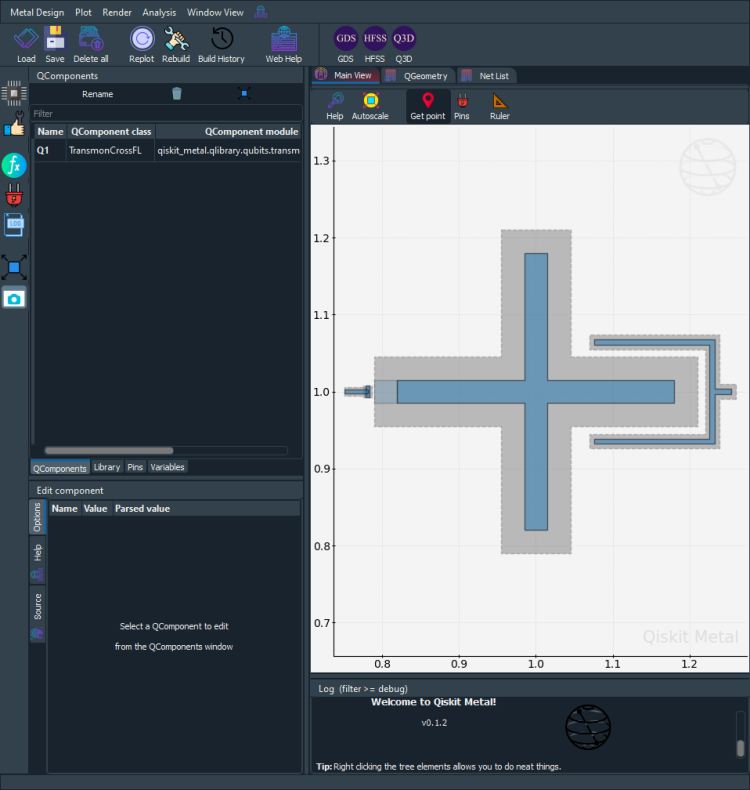

In [15]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [16]:
from qiskit_metal.analyses.quantization import EPRanalysis

eig_qb = EPRanalysis(design, "hfss")

In [17]:
hfss = eig_qb.sim.renderer
x = hfss.start()


INFO 09:36PM [connect_project]: Connecting to Ansys Desktop API...
INFO 09:36PM [load_ansys_project]: 	Opened Ansys App
INFO 09:36PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 09:36PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   Project39
INFO 09:36PM [connect_design]: 	Opened active design
	Design:    TransmonQubit_2 [Solution type: Eigenmode]
INFO 09:36PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 09:36PM [connect]: 	Connected to project "Project39" and design "TransmonQubit_2" 😀 



In [18]:
hfss.activate_ansys_design("TransmonQubit_2", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

INFO 09:36PM [connect_design]: 	Opened active design
	Design:    TransmonQubit_2 [Solution type: Eigenmode]


In [20]:
hfss.clean_active_design()

In [21]:
hfss.render_design(
                selection=['Q1'],  open_pins=[],  port_list=[("Q1","claw", resistance)], box_plus_buffer = True)

In [22]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")


Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



In [23]:
pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', set_physical_parameter(L_j, "nH"))
pinfo.design.set_variable('Cj', set_physical_parameter(C_j, "fF"))

'Cj'

In [24]:
setup.analyze()

INFO 09:37PM [analyze]: Analyzing setup Setup


In [25]:
eig_qb.sim.convergence_t, eig_qb.sim.convergence_f, _ = hfss.get_convergences()
eig_qb.sim.plot_convergences()

  df = pd.read_csv(io.StringIO(text2[3].strip()),

09:39PM 25s INFO [get_f_convergence]: Saved convergences to C:\Users\lfl\OCS_Transmon_Qubit\SQUILL\hfss_eig_f_convergence.csv


In [27]:
import numpy as np

In [28]:
freqs = eig_qb.sim.convergence_f["re(Mode(1)) [g]"].values

freqs = freqs[~np.isnan(freqs)]

qubit_freq = freqs[-1]
qubit_freq

5.00551255141253

In [29]:
pinfo = hfss.pinfo
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj',
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify

In [32]:
import pyEPR as epr

eprd = epr.DistributedAnalysis(pinfo)

Design "TransmonQubit_2" info:
	# eigenmodes    1
	# variations    1


In [34]:
eprd.do_EPR_analysis()


Variation 0  [1/1]

  Mode 0 at 5.01 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  1.903e-25 1.879e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  df = df.drop('Unnamed: 9', 1)

  df = pd.read_csv(io.StringIO(text2[3].strip()),



		Energy fraction (Lj over Lj&Cj)= 98.06%
	jj              0.988731  (+)        0.0195598
		(U_tot_cap-U_tot_ind)/mean=1.04%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.920915519893862

ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project39\TransmonQubit_2\2022-11-15 21-40-12.npz




(WindowsPath('C:/data-pyEPR/Project39/TransmonQubit_2/2022-11-15 21-40-12.npz'),
 ['0'])

In [35]:
epra = epr.QuantumAnalysis(eprd.data_filename)

WARNING 09:40PM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:




In [36]:
sim_info = epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.021094
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.969763

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       188

*** Chi matrix ND (MHz) 
       204

*** Frequencies O1 PT (MHz)
0    4817.643823
dtype: float64

*** Frequencies ND (MHz)
0    4809.988423
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


In [37]:
import pandas as pd

df = pd.DataFrame(sim_info, columns=sim_info.keys())
df

,0
Cjs,"jj 2.000000e-15 Name: 0, dtype: float64"
Ljs,"jj 1.000000e-08 Name: 0, dtype: float64"
Pm_normed,[[0.9902194287065362]]
Pm_raw,"0 0.969763 Name: jj, dtype: float64"
Q_coupling,Empty DataFrame Columns: [] Index: [0]
Qs,"0 6.262231e+06 Name: 0, dtype: float64"
ZPF,[[0.3893742649595288]]
_Pm_cap_norm,modes 0 0.46905 dtype: float64
_Pm_norm,modes 0 1.021094 dtype: float64
chi_ND,0 0 204.292344


In [38]:
EjEc_ratio = float(epra.get_Ejs('0')) / float(epra.get_Ecs('0'))
EjEc_ratio

1.6877602228352326

In [39]:
alpha = df["0"]["chi_O1"].values[0][0] #?
alpha 

187.86872800281628

The $E_j/ E_c$ make no sense!

---

# Scattering Simulation

In [42]:
# This class lets us get S Y Z parameters
from qiskit_metal.analyses.simulation import ScatteringImpedanceSim
em1 = ScatteringImpedanceSim(design, "hfss")

In [44]:
em1.setup.sweep_setup.start_ghz = 2
em1.setup.sweep_setup.stop_ghz = 18

# Change Simulation Settings
em1.setup.reuse_selected_design = False
em1.setup.reuse_setup = False
em1.setup.max_passes = 12
em1.setup.min_passes = 5
em1.setup.max_delta_s = 0.1
em1.setup.min_converged = 5
em1.setup.pct_refinement = 30
em1.setup.sweep_setup.count = 25000
em1.setup.sweep_setup.type = 'Interpolating'
# example: update multiple settings

em1.setup.vars.Lj = '10 nH'
em1.setup.vars.Cj = '0 fF'

em1.setup.junctions.jj.rect = 'JJ_rect_Lj_diss_rect_jj'
em1.setup.junctions.jj.line = 'JJ_Lj_diss_rect_jj_'

em1.setup


{'name': 'Setup',
 'reuse_selected_design': False,
 'reuse_setup': False,
 'freq_ghz': 5,
 'max_delta_s': 0.1,
 'max_passes': 12,
 'min_passes': 5,
 'min_converged': 5,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'},
 'sweep_setup': {'name': 'Sweep',
  'start_ghz': 2,
  'stop_ghz': 18,
  'count': 25000,
  'step_ghz': None,
  'type': 'Interpolating',
  'save_fields': False},
 'junctions': {'jj': {'rect': 'JJ_rect_Lj_diss_rect_jj',
   'line': 'JJ_Lj_diss_rect_jj_'}}}

In [45]:
em1._analyze()

INFO 09:49PM [get_setup]: 	Opened setup `Setup1`  (<class 'pyEPR.ansys.HfssEMSetup'>)


com_error: (-2147417851, 'The server threw an exception.', None, None)

In [46]:
em1.run()

INFO 09:49PM [get_setup]: 	Opened setup `Setup2`  (<class 'pyEPR.ansys.HfssEMSetup'>)


com_error: (-2147417851, 'The server threw an exception.', None, None)

In [ ]:
hfss = em1.renderer
hfss.activate_ansys_design("test_ocs_qubit", 'drivenmodal')

hfss.clean_active_design()

hfss.max_mesh_length_port = '0.01um'
hfss.max_mesh_length_jj = '0.015um'

hfss.render_design(selection=['Q1'], 
                   open_pins = [], 
                   port_list = [('Q1', 'claw',50)],
                   box_plus_buffer = True)